In [5]:
import cv2

In [7]:
import numpy as np
import matplotlib.pylab as plt

In [174]:
road_img = cv2.imread("C:\\Datasets\\road.jpg")
road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2RGB)

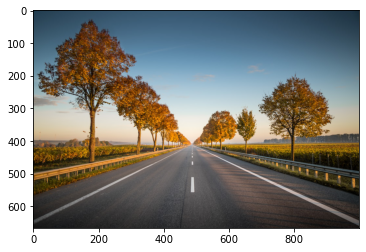

In [175]:
plt.imshow(road_img)
plt.show()

In [176]:
road_img.shape

(667, 1000, 3)

In [177]:
height = road_img.shape[0] #height

In [178]:
height

667

In [179]:
width = road_img.shape[1] #width

In [180]:
width

1000

### DEFINING REGION OF INTEREST

In [197]:
region_of_interest_vertices = [
    (0, height),
    ( width/2, height/1.7),
    (width, height)
]

### DEFINING FUNCTION REGION OF INTEREST

In [231]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

###  FIND EDGES

In [233]:
gray_img = cv2.cvtColor(road_img, cv2.COLOR_RGB2GRAY)
canny_img = cv2.Canny(gray_img, 100,200)

In [234]:
cropped_image = region_of_interest(canny_img, np.array([region_of_interest_vertices], np.int32))

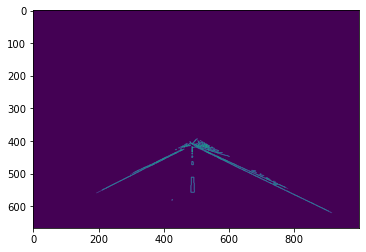

In [235]:
plt.imshow(cropped_image)
plt.show()

### PROBABILISTIC HOUGH LINE TRANSFORM

In [236]:
lines = cv2.HoughLinesP(cropped_image, rho=6, theta=np.pi/60, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)

In [264]:
def draw_lines(road_img, lines):
    road_img=np.copy(road_img)
    blank_image = np.zeros((road_img.shape[0], road_img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2,y2), (255,200,0), thickness=3)
    road_img = cv2.addWeighted(road_img, 0.8, blank_image, 1, 0.0)
    return road_img

In [265]:
image_with_lines = draw_lines(road_img, lines)

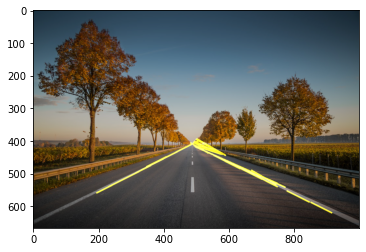

In [266]:
plt.imshow(image_with_lines)
plt.show()